# KMeans Clustering

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Loading Dataset
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
#Viewing Top 5 Rows
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [4]:
#Viewing Bottom 5 Rows
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


In [5]:
#Finding Number of rows & columns
customer_data.shape  #200 Rows & 5 columns

(200, 5)

In [6]:
#Viweing Null Values in dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


Here is No Null_Value

In [7]:
#Checking for Missing Values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Here is No Missing Values

In [8]:
#Taking columns on which clustering should be done in variable

X = customer_data.iloc[:,[3,4]]

In [9]:
#Cross Checking Columns

X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [21]:
#Finding wcss value for different numbers of clusters

wcss = []  #Within Columns Sum of Square


#Applying Loops for saving time
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

In [25]:
wcss

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156588,
 21850.165282585633,
 19672.07284901432]

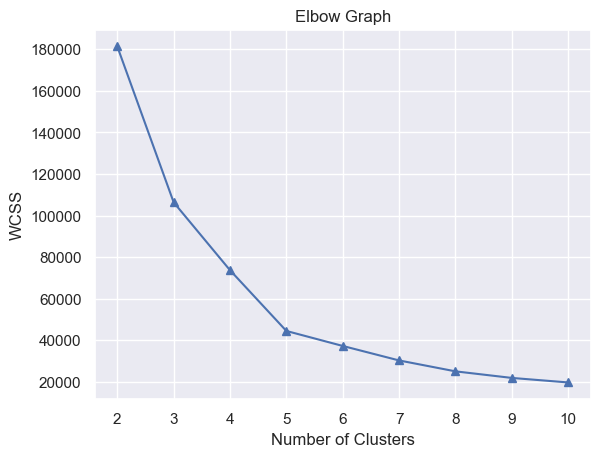

In [29]:
#Ploting Elbow Graph for minimum numbers of clusters

sns.set()
plt.plot(range(2,11), wcss, marker='^')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#Optimum number of clusters is 5

In [12]:
#Training KMeans Clustering Model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y=kmeans.fit_predict(X)    #This are labels for the cluster created
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [22]:
centroids=kmeans.cluster_centers_  #Assigning variable for centroids

In [14]:
centroids

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

# Visualizing all the clusters

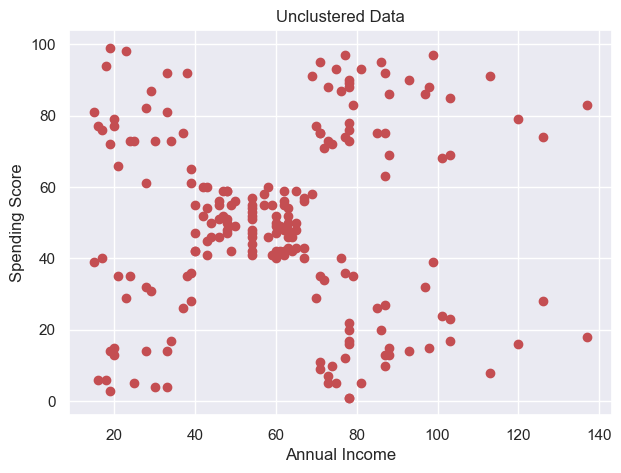

In [15]:
#visulaize the difference
plt.figure(figsize=(7,5))
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.scatter(X.iloc[:,0], X.iloc[:,1], color='r', marker='o')
plt.show()

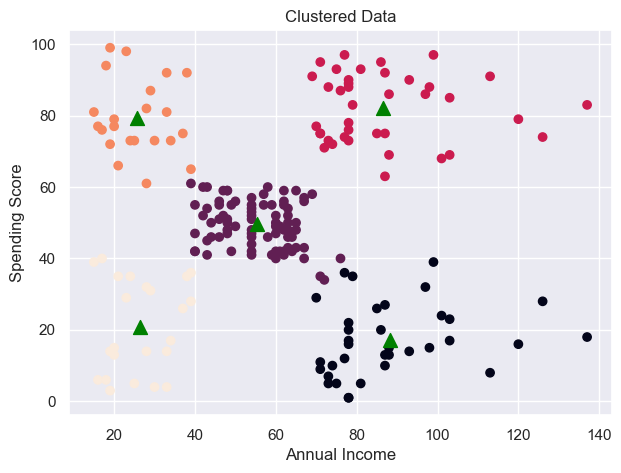

In [17]:
plt.figure(figsize=(7,5))
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', s=100, color='green')#centroid
plt.show()